# Upskill Campus - Data Science and Machine Learning Internship

## Project 5 : Crop or Weed Detection
![CropWeed](cropweed.jpg)

This project aims to train a yolov5 model to effectively identify crops and weeds and distinguish them in the given dataset.

## 1. Setting up the requirements

This project needs to setup with some requirements
- YOLOV5
- RoboFlow
- Torch
- OS

In [ ]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5 #clone repo
%cd yolov5
%pip install -qr requirements.txt #install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output #to display images

Cloning into 'yolov5'...
remote: Enumerating objects: 15927, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 15927 (delta 21), reused 30 (delta 13), pack-reused 15880
Receiving objects: 100% (15927/15927), 14.66 MiB | 13.21 MiB/s, done.
Resolving deltas: 100% (10920/10920), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.9/608.9 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 

In [ ]:
#set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

## 2. Injecting the Dataset

![RoboFlow](roboflow.png)
- The dataset has been uploaded to the RoboFlow for further data preprocessing such as Augmentation, Resizing (Stretching), Class Balancing, Splitting and Labelling. 
- Finally, the dataset has been converted into YOLOv5 format for working efficiently with the YOLOv5 model. 
- The dataset has been loaded via an API key from RoboFlow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="avuuHBHRYagoOqsufbCr")
project = rf.workspace("my-projects-eyyig").project("crop-or-weed-detection")
dataset = project.version(1).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Crop-or-Weed-Detection-1 in yolov5pytorch:: 100%|██████████| 2582/2582 [00:00<00:00, 2610.28it/s]


## 3.Training the YOLOv5 model

![Architecture](Architecture.jpg)

- The YOLOv5 model is trained using the yolov5s weights and the corresponding dataset and it's yaml file is found in the "dataset.location"
- The model is subjected to train with 50 epochs and 10 batches

In [ ]:
!python train.py --img 640 --batch 10 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Crop-or-Weed-Detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=

## 4. Model Evaluation

- The model is evaluated via a tensorboard dashboard, where various model evaluation metrics can be viewed and adjusted.

In [ ]:
# To view the metrics launch tensorboard
# Launch after you have started training
# Logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

## 5. Model Inference

- The trained model is tested with the test images using the stored best weights of the model
- Then, the test images are bounded with suitable boundary boxes with the confidence score indicating it's class (crop or weed)

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Crop-or-Weed-Detection-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/129 /content/datasets/Crop-or-Weed-Detection-1/test/images/agri_0_1140_jpeg.rf.01b817998ae924b9a2c6ac96fb39d710.jpg: 640x640 1 weed, 11.5ms
image 2/129 /content/datasets/Crop-or-Weed-Detection-1/test/images/agri_0_1146_jpeg.rf.abb4e03c6007a5eb1b23b29312664c95.jpg: 640x640 1 weed, 11.6ms
image 3/129 /con

## 6. Real-World Testing

- Some real-world images have been taken and fed into the model for inferencing.
- The predicted results are stored and can be accessed for testing the accuracy

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source {dataset.location}/real-world-testing

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/Crop-or-Weed-Detection-1/real-world-testing, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/8 /content/datasets/Crop-or-Weed-Detection-1/real-world-testing/im1.jpeg: 640x640 1 weed, 11.5ms
image 2/8 /content/datasets/Crop-or-Weed-Detection-1/real-world-testing/im2.jpeg: 640x640 (no detections), 11.5ms
image 3/8 /content/datasets/Crop-or-Weed-Detection-1/real-world-testing/im3.jpeg: 640x

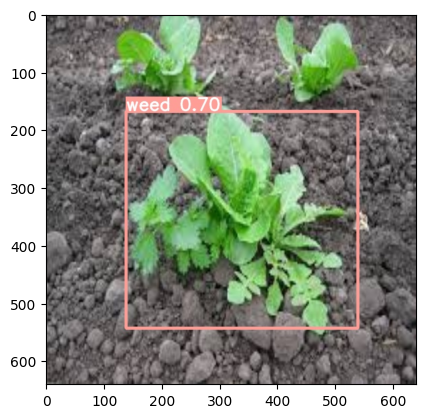

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread("runs/detect/exp3/im3.jpeg")
plt.imshow(img)

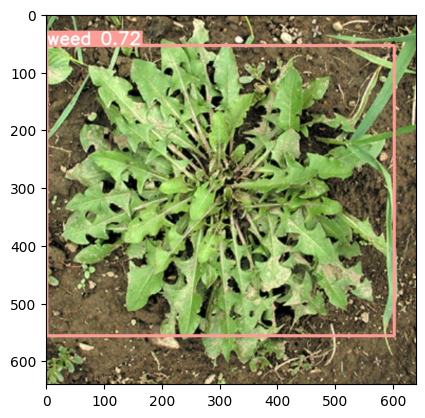

In [ ]:
img = plt.imread("runs/detect/exp3/im6.jpeg")
plt.imshow(img)

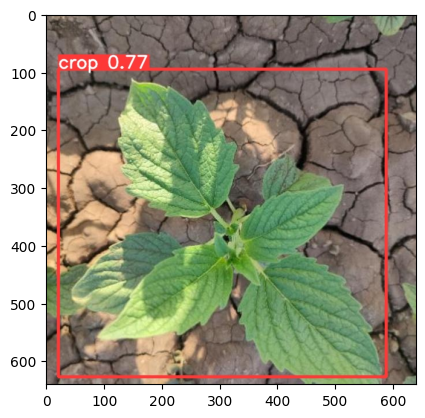

In [ ]:
img = plt.imread("runs/detect/exp2/agri_0_1314.jpg")
plt.imshow(img)

# Thank You!